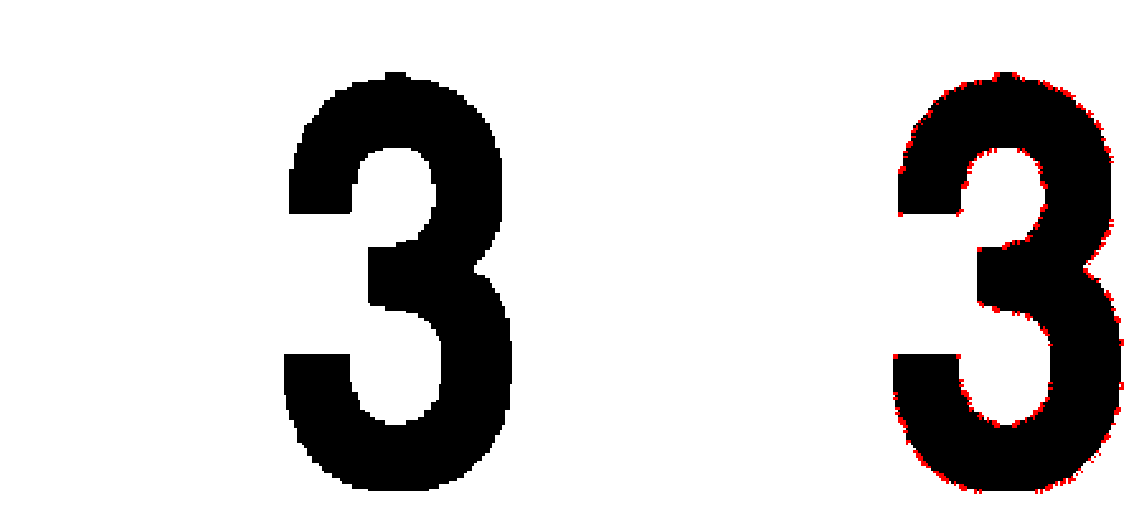

In [62]:
# 코너 추출 
import cv2

import numpy as np

import matplotlib.pyplot as plt



img = cv2.imread('test4.png') # 결과를 보기 쉽도록 체스판 그림을 사용했습니다.

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 꼭짓점 추출에는 흑백 그림이 필요합니다.

img_corner = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # 나중에 꼭짓점을 여기에 표시합니다.



img_gray = np.float32(img_gray) # 넘파이(numpy)를 사용해서 자료형을 부동소수점으로 바꾸어주어야 합니다.

result = cv2.cornerHarris(img_gray, 2, 3, 0.04) # 2, 3, 0.04는 바꿀 수 있는 인자들입니다.

# print(result.shape)
"""
for i, data in enumerate(result):
    for j, d in enumerate(data):
        if d != 0:
            print(i, j)
"""         
#result = cv2.dilate(result, None, iterations=6) # 꼭짓점을 표시하기 위해 확장 (dilate) 연산을 합니다.
#print(result.shape)
img_corner[result>0.01*result.max()]=[255, 0, 0] # 꼭짓점이 빨간색 점으로 그림에 표시됩니다.


# 이 아래 부분은 그림을 화면에 출력하기 위한 부분으로, OpenCV 알고리즘과는 상관이 없습니다.
plt.figure(figsize=(20,17))

plt.subplot(1, 2, 1) # 1행 2열에서 1번째 열

plt.imshow(img_rgb)

plt.xticks([]) # x축 좌표 숨김

plt.yticks([]) # y축 좌표 숨김



plt.subplot(1, 2, 2) # 1행 2열에서 2번째 열

plt.imshow(img_corner)

plt.xticks([]) # x축 좌표 숨김

plt.yticks([]) # y축 좌표 숨김

#plt.subplot(2, 2, 3) # 1행 2열에서 2번째 열

#plt.imshow(result)
plt.show()

# 출처: https://crmn.tistory.com/57 [크롬망간이 글 쓰는 공간]

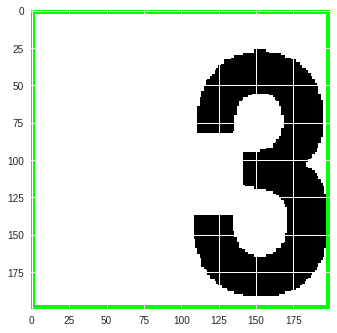

In [0]:
import numpy as np
import cv2

def contour_approx():
    imgfile = 'test4.png'
    img = cv2.imread(imgfile)
    img2 = img.copy()
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    ret, thr = cv2.threshold(img_gray, 127, 255, 0)
    edge, contours, hierarchy = cv2.findContours(thr, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    cnt = contours[0]
    cv2.drawContours(img, [cnt], 0, (0, 255, 0), 3)
    
    epsilon = 0.1 * cv2.arcLength(cnt, True)
    
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    
    cv2.drawContours(img2, [approx], 0, (0, 255, 0), 3)
    
    plt.imshow(img)
    plt.imshow(img2)

    
if __name__ == '__main__':
    contour_approx()
    
    

In [0]:
import numpy as np
import cv2

def contour_approx():
    imgfile = 'test0.png'
    img = cv2.imread(imgfile)
    img2 = img.copy()
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    ret, thr = cv2.threshold(img_gray, 127, 255, 0)
    edge, contours, hierarchy = cv2.findContours(thr, cv2.RETR_TREE, 
                                                 cv2.CHAIN_APPROX_SIMPLE)
    
    cnt = contours[0]
    
    hull = cv2.convexHull(cnt)
    cv2.drawContours(img, [hull], 0, (0, 0, 255), 2)
    
    hull = cv2.convexHull(cnt, returnPoints=False)
    defects = cv2.convexityDefects(cnt, hull)
    
    for i in range(defects.shape[0]):
        sp, ep, fp, dist = defects[i, 0]
        start = tuple(cnt[sp][0])
        end = tuple(cnt[ep][0])
        farthest = tuple(cnt[fp][0])
        
        cv2.circle(img, farthest, 5, (0, 255, 0), -1)
        
    plt.imshow(img)

if __name__ == '__main__':
    contour_approx()
    
    

AttributeError: ignored

(1, 1, 3)


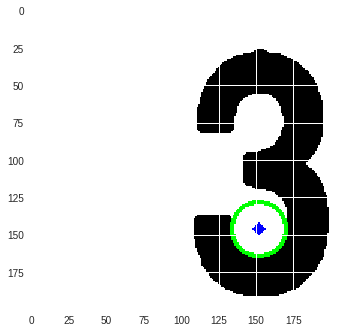

In [57]:
# 원 검출
# 출처 : https://webnautes.tistory.com/949
import numpy as np
import cv2 as cv

img = cv.imread('test4.png',0)
img = cv.medianBlur(img,5)
cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)

circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,20,
                            param1=50,param2=25,minRadius=0,maxRadius=0)
print(circles.shape)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    # draw the outer circle
    cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

plt.imshow(cimg)

In [33]:
import cv2
import numpy as np

img = cv2.imread('1_궁.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

lines = cv2.HoughLines(edges, 1, np.pi/180, 200)
print(lines)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

plt.imshow(img)

None


TypeError: ignored

In [34]:
import cv2
import numpy as np

img = cv2.imread('1_궁.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
minLineLength = 100
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
for x1,y1,x2,y2 in lines[0]:
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

plt.imshow(img)

TypeError: ignored

(313, 313, 3)

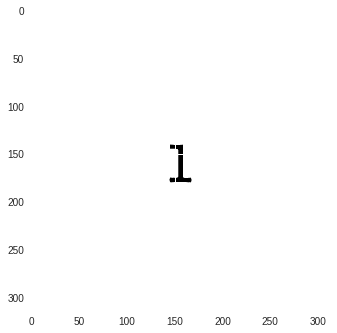

In [39]:
import numpy as np
import cv2

img = cv2.imread('1_궁.png')
plt.imshow(img)

img.shape

In [134]:
# 코너 추출 
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize 
%matplotlib inline

# normalize(X, norm=’l2’, axis=1, copy=True, return_norm=False
                                
def corner_harris_feature_extraction(img_path):
    img = cv2.imread(img_path)

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    img_corner = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    img_gray = np.float32(img_gray) 

    result = cv2.cornerHarris(img_gray, 2, 3, 0.04)
    
    result_norm = normalize(result.reshape(-1, 1))
    # result_norm = result_norm.reshape(200, 200)
    
    print(result_norm)
    img_corner[result>0.01*result.max()]=[255, 0, 0]

    print(result_norm.min(), result_norm.max())
    
    plt.figure(figsize=(20,17))
    #plt.imshow(result_norm)
    plt.plot(result_norm)

In [135]:
help(cv2.cornerHarris)

Help on built-in function cornerHarris:

cornerHarris(...)
    cornerHarris(src, blockSize, ksize, k[, dst[, borderType]]) -> dst
    .   @brief Harris corner detector.
    .   
    .   The function runs the Harris corner detector on the image. Similarly to cornerMinEigenVal and
    .   cornerEigenValsAndVecs , for each pixel \f$(x, y)\f$ it calculates a \f$2\times2\f$ gradient covariance
    .   matrix \f$M^{(x,y)}\f$ over a \f$\texttt{blockSize} \times \texttt{blockSize}\f$ neighborhood. Then, it
    .   computes the following characteristic:
    .   
    .   \f[\texttt{dst} (x,y) =  \mathrm{det} M^{(x,y)} - k  \cdot \left ( \mathrm{tr} M^{(x,y)} \right )^2\f]
    .   
    .   Corners in the image can be found as the local maxima of this response map.
    .   
    .   @param src Input single-channel 8-bit or floating-point image.
    .   @param dst Image to store the Harris detector responses. It has the type CV_32FC1 and the same
    .   size as src .
    .   @param blockSize Neighb

[[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
-1.0 1.0


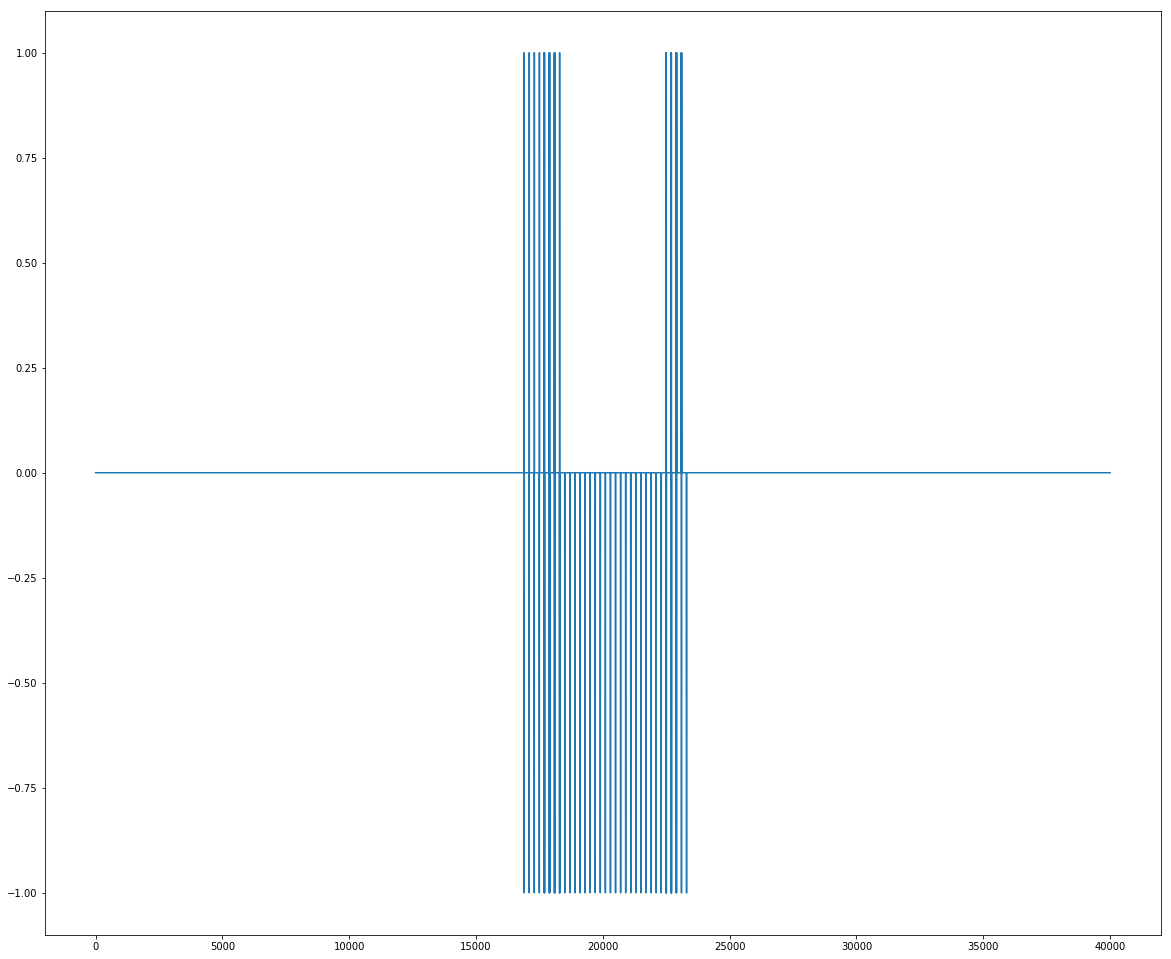

In [136]:
corner_harris_feature_extraction('./data/raw/raw_smj_1.png')
#corner_harris_feature_extraction('./data/zoom/number_0/zoom_gl_3.png')